# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Mahika Bansal

EID: mb62835

Name: Dipali Pandey

EID: dp33957

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:
AdaBoost and Gradient Boosting are ensemble models and use multiple weak learners for building a strong classifier. 

In AdaBoost or Adaptive Boosting, misclassfied classes are given more weight than the ones handled well. It automatically adjusts its parameters given the performance in the current iteration. It can be utilised to boost the performance of decision trees and is most commonly used with stumps or single split decision trees. It also assigns weights to every classifier based on the prediction accuracy. But the model is highly affected by outliers and noise in the data. 

Gradient Boost comprises of 3 elements: Loss function, weak learner and additive model. It uses the residual of the current classifier as the input for the next classifier. The residuals are captured in a step-by-step manner by introduing the learning rate to the classifiers, in order to capture the maximum variance within the data. This method allows gradual inching in the right direction towards better prediction. 

Difference between AdaBoost and Gradient Boost:

AdaBoost: Adaboost is an additive model where shortcomings of previous classifiers are identified by higher weighted observations. The underlying models might be stumps with each classifier having different weights based on performance capturing maximum variance. 

Gradient Boost: It is an additive model where shortcomings of previous classifiers are identified by gradient. The underlying tree models might have more splits with each of them having equal weightage. It uses residuals of the previous model to train the next model. Instead of adding predictors to improve accuracy as in Adaboost, it tweaks a single model's parameters to optimize loss.

# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [53]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {} kernel'.format(kernel))
  plt.show()

In [54]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
    svc = make_pipeline(StandardScaler(), SVC(C=C,kernel = kernel,gamma=gamma))
    svc.fit(X,y)
    return svc

## Answer:


## a)

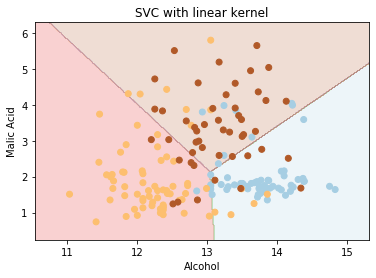

Accuracy:  0.7865168539325843


In [55]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
pred = svc.predict(X)
plot_model(X, y, svc, kernel='linear')
print("Accuracy: ",accuracy_score(y,pred))

## b)

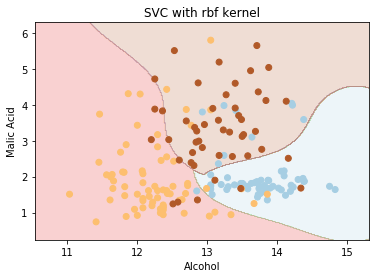

Accuracy:  0.8314606741573034


In [56]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
pred = svc.predict(X)
plot_model(X, y, svc, kernel='rbf')
print("Accuracy: ",accuracy_score(y,pred))

### RBF kernel is able to separate the classes with higher accuracy than the linear kernel.



## c)

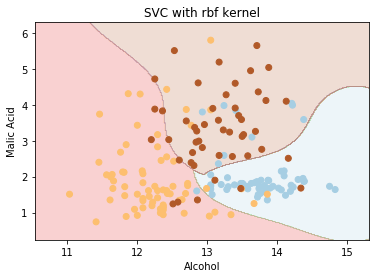

Accuracy with gamma= 0.5  :  0.8314606741573034


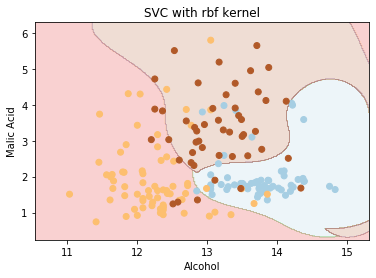

Accuracy with gamma= 1  :  0.8426966292134831


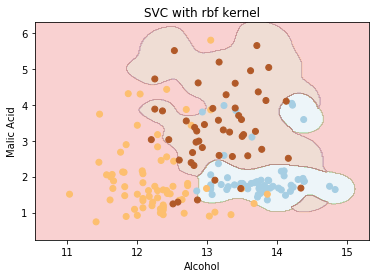

Accuracy with gamma= 10  :  0.8932584269662921


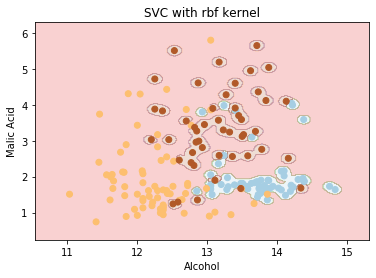

Accuracy with gamma= 100  :  0.9943820224719101


In [57]:
gamma = [0.5, 1, 10, 100]
for i in gamma:
    svc = train_model(X, y, kernel='rbf', C=1, gamma=i)
    pred = svc.predict(X)
    plot_model(X, y, svc, kernel='rbf')
    print("Accuracy with gamma=",i," : ",accuracy_score(y,pred))

### With increasing value of gamma, the prediction or the accuracy increases with increased complexity of the model. This might lead to overfitting.

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## Answer:

## a)

In [60]:
tree = DecisionTreeClassifier(random_state = 10)
tree.fit(X_train, y_train)
pred_classes = tree.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred_classes))
print("ROC_AUC_Score: ", roc_auc_score(y_test,tree.predict_proba(X_test)[:,1]))

Accuracy:  0.9098090849242922
ROC_AUC_Score:  0.9040453749567611


In [61]:
log = LogisticRegression(random_state = 10,solver="newton-cg")
log.fit(X_train, y_train)
pred_classes = log.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred_classes))
print("ROC_AUC_Score: ", roc_auc_score(y_test,log.predict_proba(X_test)[:,1]))

Accuracy:  0.9315339038841343
ROC_AUC_Score:  0.9734682742610166


## b)

In [62]:
bag_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50, random_state=10).fit(X_train, y_train)
pred_classes = bag_tree.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred_classes))
print("ROC_AUC_Score: ", roc_auc_score(y_test,bag_tree.predict_proba(X_test)[:,1]))

Accuracy:  0.9394338380513496
ROC_AUC_Score:  0.9804034320071037


In [63]:
bag_log = BaggingClassifier(base_estimator=LogisticRegression(solver="newton-cg"),n_estimators=50, random_state=10).fit(X_train, y_train)
pred_classes = bag_log.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred_classes))
print("ROC_AUC_Score: ", roc_auc_score(y_test,bag_log.predict_proba(X_test)[:,1]))

Accuracy:  0.934167215273206
ROC_AUC_Score:  0.9755383907652478


### For tree classifier, the model accuracy increased significantly with bagging, whereas it only improved slightly for logistic regression.

## c)

In [64]:
rf = RandomForestClassifier()
parameters = {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}
rf_cv = GridSearchCV(rf,parameters)
rf_cv.fit(X_train,y_train)
pred_classes = rf_cv.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred_classes))
print("ROC_AUC_Score: ", roc_auc_score(y_test,rf_cv.predict_proba(X_test)[:,1]))

Accuracy:  0.9552337063857801
ROC_AUC_Score:  0.9891234188838844


In [65]:
print(rf_cv.best_params_)

{'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}


## d)

In [66]:
gb = GradientBoostingClassifier()
parameters = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}
gb_cv = GridSearchCV(gb,parameters)
gb_cv.fit(X_train,y_train)
pred_classes = gb_cv.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred_classes))
print("ROC_AUC_Score: ", roc_auc_score(y_test,gb_cv.predict_proba(X_test)[:,1]))

Accuracy:  0.9552337063857801
ROC_AUC_Score:  0.9889183685841544


In [67]:
print(gb_cv.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0}


In [68]:
ab = AdaBoostClassifier()
parameters = {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}
ab_cv = GridSearchCV(ab,parameters)
ab_cv.fit(X_train,y_train)
pred_classes = ab_cv.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,pred_classes))
print("ROC_AUC_Score: ", roc_auc_score(y_test,ab_cv.predict_proba(X_test)[:,1]))

Accuracy:  0.9512837393021725
ROC_AUC_Score:  0.9858836241481498


In [70]:
print(ab_cv.best_params_)

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}


## e)

In [83]:
import copy
n_estimators= [10, 100, 500]
acc = pd.DataFrame(np.zeros([3,4]), columns = ['n_estimators','RandomForest','GradientBoost','AdaBoost'])
acc['n_estimators'] = n_estimators
roc_auc = copy.deepcopy(acc)

In [86]:
for i in range(3):
    rf = RandomForestClassifier(criterion ='gini', n_estimators = n_estimators[i], random_state = 42)
    rf.fit(X_train,y_train)
    pred_classes = rf.predict(X_test)
    acc.iloc[i,1] = accuracy_score(y_test,pred_classes)
    roc_auc.iloc[i,1] = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])

In [87]:
for i in range(3):
    gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, n_estimators =n_estimators[i], random_state = 42, subsample = 1.0)
    gb.fit(X_train,y_train)
    pred_classes = gb.predict(X_test)
    acc.iloc[i,2] = accuracy_score(y_test,pred_classes)
    roc_auc.iloc[i,2] = roc_auc_score(y_test,gb.predict_proba(X_test)[:,1])

In [88]:
for i in range(3):
    ab = AdaBoostClassifier(learning_rate = 0.1, n_estimators =n_estimators[i], random_state = 42)
    ab.fit(X_train,y_train)
    pred_classes = ab.predict(X_test)
    acc.iloc[i,3] = accuracy_score(y_test,pred_classes)
    roc_auc.iloc[i,3] = roc_auc_score(y_test,ab.predict_proba(X_test)[:,1])

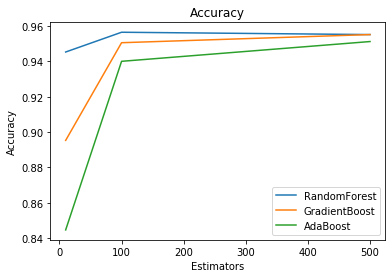

In [94]:
plt.plot(acc.iloc[:,0],acc.iloc[:,1])
plt.plot(acc.iloc[:,0],acc.iloc[:,2])
plt.plot(acc.iloc[:,0],acc.iloc[:,3])
plt.legend(['RandomForest','GradientBoost','AdaBoost'],loc = 'best')
plt.title('Accuracy')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()

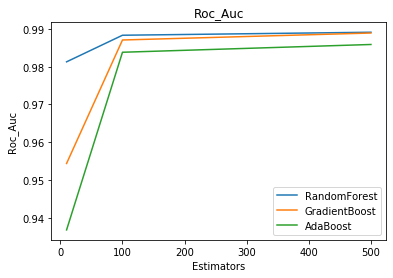

In [95]:
plt.plot(roc_auc.iloc[:,0],roc_auc.iloc[:,1])
plt.plot(roc_auc.iloc[:,0],roc_auc.iloc[:,2])
plt.plot(roc_auc.iloc[:,0],roc_auc.iloc[:,3])
plt.legend(['RandomForest','GradientBoost','AdaBoost'],loc = 'best')
plt.title('Roc_Auc')
plt.xlabel('Estimators')
plt.ylabel('Roc_Auc')
plt.show()